![](https://media.giphy.com/media/2ilpqokCAJSwj9MDbz/giphy.gif)

# Introduction

Hi all!
This kernel is about Predicting the money spent by People on Health.<br>
Hoping you will like it...

Please UPVOTE if my hope works :)

![](https://cdn.pixabay.com/photo/2016/02/02/13/10/balloons-1175297_960_720.jpg)

# EDA

>Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from scipy.stats import kurtosis,skew

> Reading Data

In [2]:
dtypes={'sex':'category','smoker':'category','region':'category'}
data= pd.read_csv('../input/insurance.csv',dtype=dtypes)

> Top 5 rows

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> Overview of Data

In [4]:
pp.ProfileReport(data)

> Removing all duplicate rows

In [5]:
data=data.drop_duplicates(data.columns).reset_index(drop=True)

> Information about columns

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null category
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null category
region      1337 non-null category
charges     1337 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.6 KB


> Statistical Analysis of Numeric Columns

In [7]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


> Number of Null Values

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

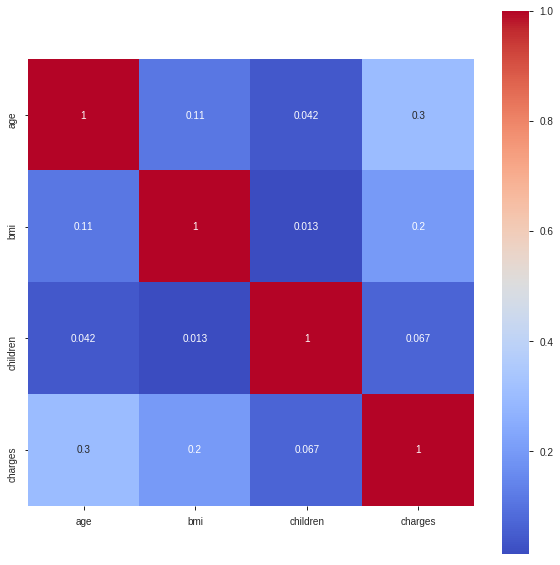

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,square=True,cmap='coolwarm')

## Univariate Analysis

#### 1) AGE

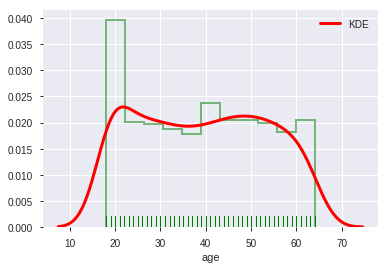

In [10]:
sns.distplot(data.age, rug=True, rug_kws={"color": "g"},
...                   kde_kws={"color": "r", "lw": 3, "label": "KDE"},
...                   hist_kws={"histtype": "step", "linewidth": 2,
...                             "alpha": 0.5, "color": "g"})

**Age is having almost a Uniform Distribution**<br>
**More 18-19 years old are there**

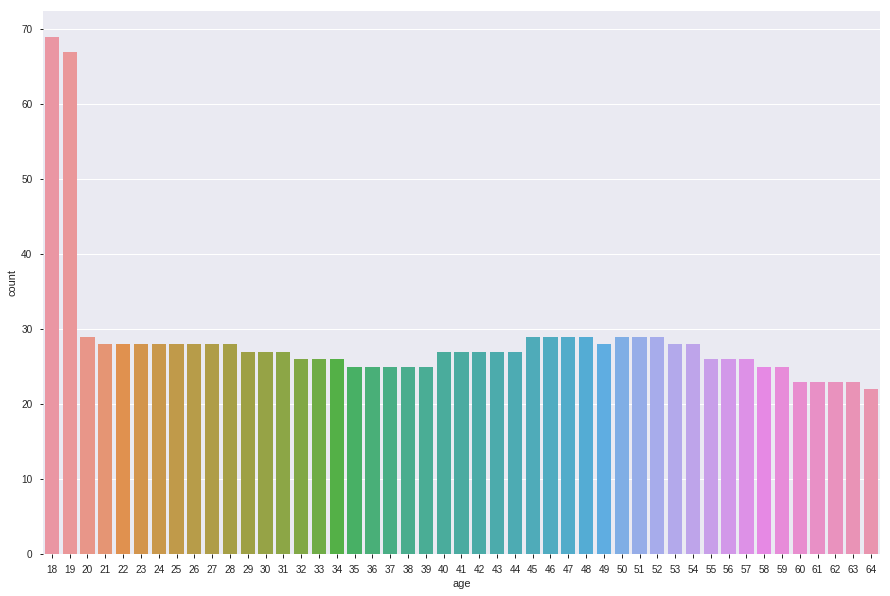

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(data.age)

**Most insurances are done in age 18-19**

#### 2) BMI

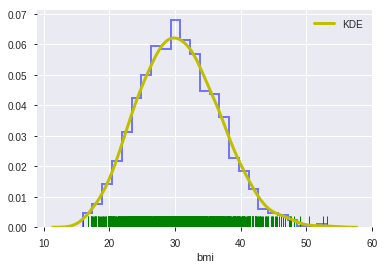

In [12]:
sns.distplot(data.bmi, rug=True, rug_kws={"color": "g"},
...                   kde_kws={"color": "y", "lw": 3, "label": "KDE"},
...                   hist_kws={"histtype": "step", "linewidth": 2,
...                             "alpha": 0.5, "color": "b"})

**Pure Normal Distribution(approximately) of BMI**

![](https://media.giphy.com/media/BuwdPoYAnoyCk/giphy.gif)

#### 3) Children

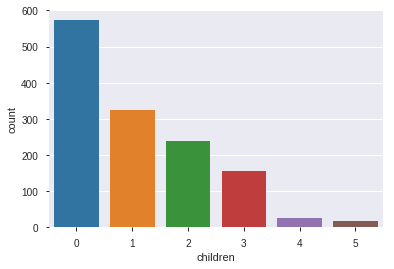

In [13]:
sns.countplot(data.children)

#### 4) SMOKER

![](https://media.giphy.com/media/HtyM9FYa9koCY/giphy.gif)

In [14]:
data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

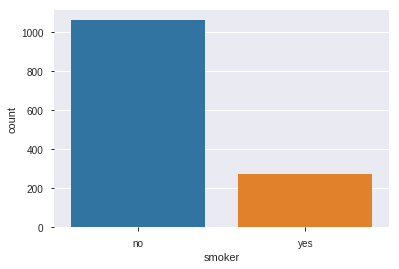

In [15]:
sns.countplot(data.smoker)

**Huge number of non-smokers...**

#### 5) SEX

In [16]:
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

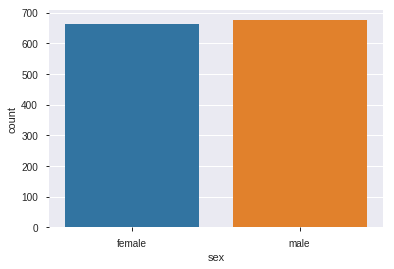

In [17]:
sns.countplot(data.sex)

**Almost equal number of males and females**

#### 6) Region

In [18]:
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

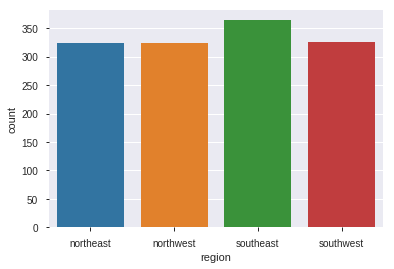

In [19]:
sns.countplot(data.region)

**Nearly equal frequencies of each category...**

#### 7) Charges

In [20]:
print(kurtosis(data.charges))
print(skew(data.charges))

1.5937433292737193
1.5136902413349014


**If skewness is less than -1 or greater than 1, the distribution is highly skewed.**<br>

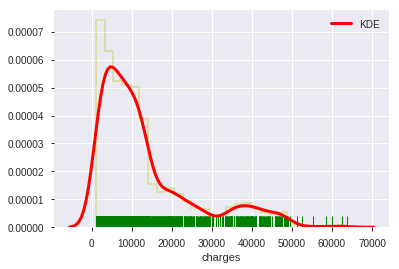

In [21]:
sns.distplot(data.charges, rug=True, rug_kws={"color": "g"},
...                   kde_kws={"color": "red", "lw": 3, "label": "KDE"},
...                   hist_kws={"histtype": "step", "linewidth": 2,
...                             "alpha": 0.3, "color": "y"})

## Bivariate Analysis

#### 1) AGE

In [22]:
data[data.columns].corr()['age'][:]

age         1.000000
bmi         0.109344
children    0.041536
charges     0.298308
Name: age, dtype: float64

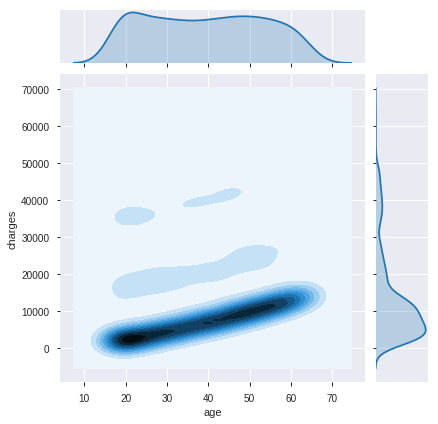

In [23]:
sns.jointplot(data.age,data.charges,kind='kde')

#### 2) BMI 

In [24]:
data[data.columns].corr()['bmi'][:]

age         0.109344
bmi         1.000000
children    0.012755
charges     0.198401
Name: bmi, dtype: float64

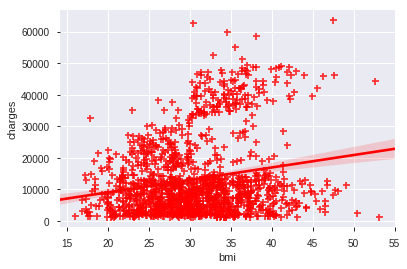

In [25]:
sns.regplot(data.bmi,data.charges,color='r',marker='+')

### Categorical Data 

#### 1) Sex

In [26]:
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [27]:
data.sex = np.where(data.sex=='male', 0, data.sex)
data.sex = np.where(data.sex=='female', 1, data.sex)

In [28]:
data.sex=data.sex.apply(pd.to_numeric,errors='coerce')

#### 2) Children

In [29]:
data.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

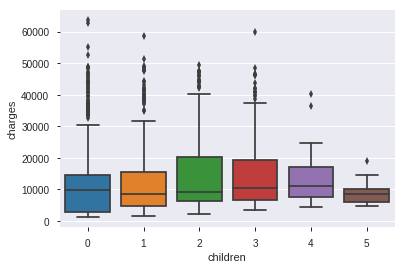

In [30]:
sns.boxplot(data.children,data.charges)

In [31]:
'''data.children = np.where(data.children==3, 3, data.children)
data.children = np.where(data.children==4, 3, data.children)
data.children = np.where(data.children==5, 3, data.children)'''

'data.children = np.where(data.children==3, 3, data.children)\ndata.children = np.where(data.children==4, 3, data.children)\ndata.children = np.where(data.children==5, 3, data.children)'

In [32]:
df=pd.get_dummies(data.children,drop_first=True)
data=pd.concat([df,data],axis=1)
del data['children']

#### 3) Region

In [33]:
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

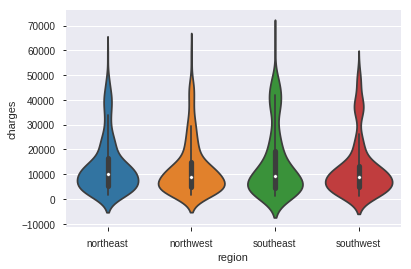

In [34]:
sns.violinplot(data.region,data.charges)

In [35]:
data.region=data.region.astype('object')

In [36]:
df=pd.get_dummies(data.region,drop_first=True)
data=pd.concat([df,data],axis=1)
del data['region']

#### 4) Smoker

In [37]:
data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

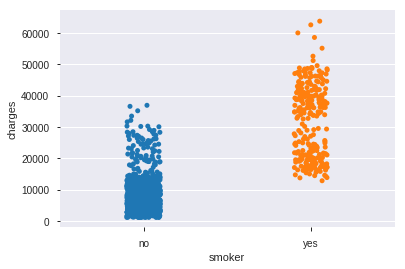

In [38]:
sns.stripplot(data.smoker,data.charges,jitter=True)

![](https://media.giphy.com/media/SqmkZ5IdwzTP2/giphy.gif)

In [39]:
data.smoker = np.where(data.smoker=='no', 0, data.smoker)
data.smoker = np.where(data.smoker=='yes', 1, data.smoker)

In [40]:
data.smoker=data.smoker.apply(pd.to_numeric,errors='coerce')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 13 columns):
northwest    1337 non-null uint8
southeast    1337 non-null uint8
southwest    1337 non-null uint8
1            1337 non-null uint8
2            1337 non-null uint8
3            1337 non-null uint8
4            1337 non-null uint8
5            1337 non-null uint8
age          1337 non-null int64
sex          1337 non-null int64
bmi          1337 non-null float64
smoker       1337 non-null int64
charges      1337 non-null float64
dtypes: float64(2), int64(3), uint8(8)
memory usage: 62.8 KB


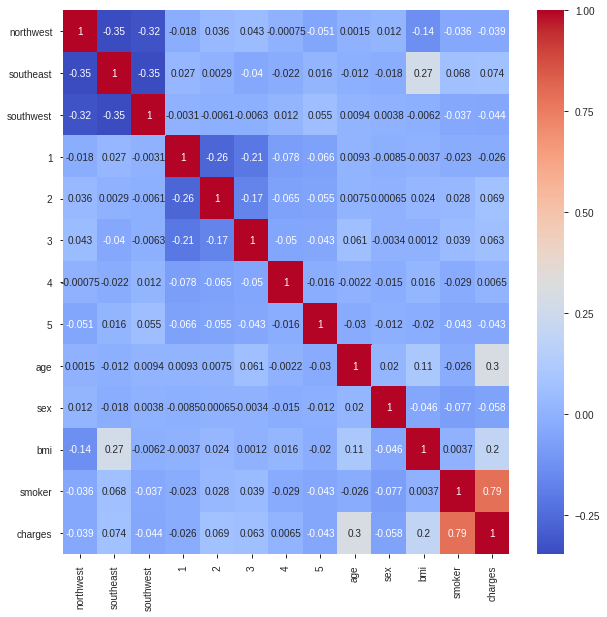

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

## Modelling

In [43]:
X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
import xgboost
from xgboost import XGBRegressor
lr=XGBRegressor()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

[18:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [46]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y_pred_train))

0.9030345796674413
0.8835900792602459


![](https://media.giphy.com/media/WnIu6vAWt5ul3EVcUE/giphy.gif)